###

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
#sc is the Spark Context already available at databricks, so we do not need to create it again.
#sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [0]:
products = sc.textFile("/FileStore/tables/SalesData_1.txt")

In [0]:
products.first()

Out[9]: 'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [0]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns
Out[10]: ['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [0]:
head = products.first()
content = products.filter(lambda line: line != head)

In [0]:
content.first()

Out[12]: '680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [0]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

Out[14]: 17

# Example of RDD using Scala

In [0]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

Out[34]: [['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Spark Dataframe syntax and SQL Table syntax

In [0]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
df1 = df.select(df.Name, df.Weight.cast("float"))
df1.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+
only showing top 5 rows



In [0]:
# convert the above Dataframe into SQL Table
df1.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT * FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+



# Write your solution for Spark Dataframe and Spark SQL. Your output should match with the RDD output

## 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

### Using RDD

In [0]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

Out[35]: [('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

### Using Spark DataFrame

In [0]:
df = rdd1.toDF(header)
df1 = df.select(df['Name'], df['Weight'].cast("float"))

sorted_df1 = df1.sort(desc('Weight'))

# Displaying the DataFrame
sorted_df1.show(15,truncate=False)


+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+
only showing top 15 rows



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, CAST(Weight AS FLOAT) AS Weight FROM df_table ORDER BY Weight DESC limit 15 ").show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



## 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

### Using RDD

In [0]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

Out[48]: [('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

### Using Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df1 = df.select(df['Name'], df['Color'], df['Size'], df['ProductModelID']).filter(df['ProductModelID'] == 5)
df1.show()

+--------------------+------+----+--------------+
|                Name| Color|Size|ProductModelID|
+--------------------+------+----+--------------+
|HL Mountain Frame...|Silver|  42|             5|
|HL Mountain Frame...|Silver|  44|             5|
|HL Mountain Frame...|Silver|  48|             5|
|HL Mountain Frame...|Silver|  46|             5|
|HL Mountain Frame...| Black|  42|             5|
|HL Mountain Frame...| Black|  44|             5|
|HL Mountain Frame...| Black|  48|             5|
|HL Mountain Frame...| Black|  46|             5|
|HL Mountain Frame...| Black|  38|             5|
|HL Mountain Frame...|Silver|  38|             5|
+--------------------+------+----+--------------+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, Color, Size, ProductModelID FROM df_table where ProductModelID= 5").show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



## 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

### Using RDD

In [0]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

Out[49]: [('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

### Using Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df1 = df.select('Name', 'ProductNumber','Color','Size').filter((df['Color'].isin(['Black', 'Red', 'White'])) & ((df['Size'] == 'S') | (df['Size'] == 'M')))
df1.show()

+--------------------+-------------+-----+----+
|                Name|ProductNumber|Color|Size|
+--------------------+-------------+-----+----+
|Mountain Bike Soc...|    SO-B909-M|White|   M|
|Men's Sports Shor...|    SH-M897-S|Black|   S|
|Men's Sports Shor...|    SH-M897-M|Black|   M|
|   Women's Tights, S|    TG-W091-S|Black|   S|
|   Women's Tights, M|    TG-W091-M|Black|   M|
|Half-Finger Glove...|    GL-H102-S|Black|   S|
|Half-Finger Glove...|    GL-H102-M|Black|   M|
|Full-Finger Glove...|    GL-F110-S|Black|   S|
|Full-Finger Glove...|    GL-F110-M|Black|   M|
|Women's Mountain ...|    SH-W890-S|Black|   S|
|Women's Mountain ...|    SH-W890-M|Black|   M|
|     Racing Socks, M|    SO-R809-M|White|   M|
+--------------------+-------------+-----+----+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, ProductNumber, Color,Size FROM df_table where Color in ('Black', 'Red', 'White') and Size in ('M','S') ").show(truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



## 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

### Using RDD

In [0]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

Out[100]: [('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

### Using Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df1 = df.select('Name', 'ProductNumber','Color','ListPrice').filter(df['ProductNumber'].startswith('BK'))
df1.sort(desc('ListPrice')).show(15,truncate=False)

+-------------------------+-------------+------+---------+
|Name                     |ProductNumber|Color |ListPrice|
+-------------------------+-------------+------+---------+
|Road-650 Black, 58       |BK-R50B-58   |Black |782.99   |
|Road-650 Black, 62       |BK-R50B-62   |Black |782.99   |
|Road-650 Red, 58         |BK-R50R-58   |Red   |782.99   |
|Road-650 Red, 60         |BK-R50R-60   |Red   |782.99   |
|Road-650 Red, 62         |BK-R50R-62   |Red   |782.99   |
|Road-650 Red, 44         |BK-R50R-44   |Red   |782.99   |
|Road-650 Red, 48         |BK-R50R-48   |Red   |782.99   |
|Road-650 Red, 52         |BK-R50R-52   |Red   |782.99   |
|Road-650 Black, 60       |BK-R50B-60   |Black |782.99   |
|Road-650 Black, 44       |BK-R50B-44   |Black |782.99   |
|Road-650 Black, 48       |BK-R50B-48   |Black |782.99   |
|Road-650 Black, 52       |BK-R50B-52   |Black |782.99   |
|Mountain-400-W Silver, 38|BK-M38S-38   |Silver|769.49   |
|Mountain-400-W Silver, 40|BK-M38S-40   |Silver|769.49  

### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT Name, ProductNumber, Color, ListPrice FROM df_table WHERE ProductNumber LIKE 'BK%' ORDER BY ListPrice DESC LIMIT 15 ").show(truncate=False)

+-------------------------+-------------+------+---------+
|Name                     |ProductNumber|Color |ListPrice|
+-------------------------+-------------+------+---------+
|Road-650 Red, 52         |BK-R50R-52   |Red   |782.99   |
|Road-650 Black, 58       |BK-R50B-58   |Black |782.99   |
|Road-650 Red, 48         |BK-R50R-48   |Red   |782.99   |
|Road-650 Red, 58         |BK-R50R-58   |Red   |782.99   |
|Road-650 Red, 60         |BK-R50R-60   |Red   |782.99   |
|Road-650 Red, 62         |BK-R50R-62   |Red   |782.99   |
|Road-650 Red, 44         |BK-R50R-44   |Red   |782.99   |
|Road-650 Black, 52       |BK-R50B-52   |Black |782.99   |
|Road-650 Black, 60       |BK-R50B-60   |Black |782.99   |
|Road-650 Black, 62       |BK-R50B-62   |Black |782.99   |
|Road-650 Black, 44       |BK-R50B-44   |Black |782.99   |
|Road-650 Black, 48       |BK-R50B-48   |Black |782.99   |
|Mountain-400-W Silver, 38|BK-M38S-38   |Silver|769.49   |
|Mountain-400-W Silver, 40|BK-M38S-40   |Silver|769.49  

## 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline
from pyspark.sql.functions import col, avg


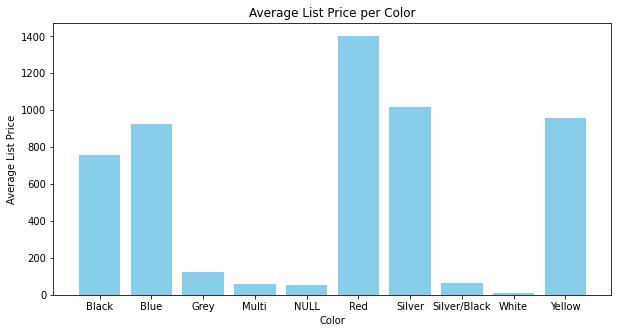

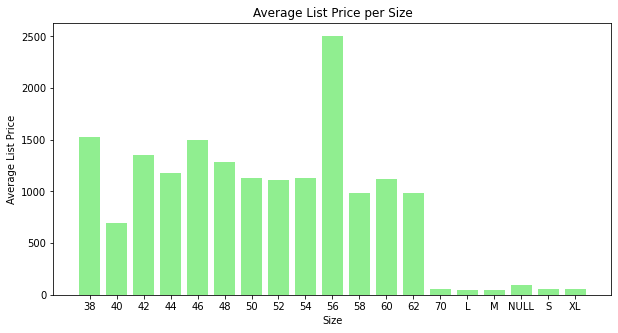

In [0]:
df = rdd1.toDF(header)
average_price_per_color = (
    df.groupBy('Color')
    .agg(avg('ListPrice').alias('AverageListPrice'))
    .orderBy('Color')
)

# Compute average list price per size
average_price_per_size = (
    df.groupBy('Size')
    .agg(avg('ListPrice').alias('AverageListPrice'))
    .orderBy('Size')
)

# Visualize Average List Price per Color
colors = average_price_per_color.select('Color').rdd.flatMap(lambda x: x).collect()
average_prices_color = average_price_per_color.select('AverageListPrice').rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 5))
plt.bar(colors, average_prices_color, color='skyblue')
plt.xlabel('Color')
plt.ylabel('Average List Price')
plt.title('Average List Price per Color')
plt.show()

# Visualize Average List Price per Size
sizes = average_price_per_size.select('Size').rdd.flatMap(lambda x: x).collect()
average_prices_size = average_price_per_size.select('AverageListPrice').rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 5))
plt.bar(sizes, average_prices_size, color='lightgreen')
plt.xlabel('Size')
plt.ylabel('Average List Price')
plt.title('Average List Price per Size')
plt.show()
#Explanatyion:
# The visualizations of average list price per color and per size offer insightful perspectives into the pricing patterns of products in the dataset. Analyzing the average list prices across different colors reveals that products in 'Red' command the highest average list prices, followed closely by those in 'Silver'. Meanwhile, 'Blue' and 'Yellow' exhibit comparable average list prices, securing the third and fourth positions. Notably, products in 'Black' demonstrate a relatively lower average list price. Turning attention to average list prices per size, the findings highlight that products in sizes '56' and '38' emerge as frontrunners with the highest average list prices. Particularly, size '56' claims the top position with an average list price of approximately 2500 price units, closely trailed by size '38'. The analysis also underscores that other sizes exhibit comparatively lower average list prices. 

## 5. Visualize Total Count per Size. Discuss/Explain your results.

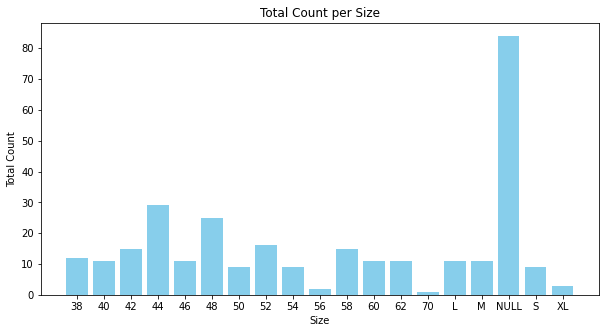

In [0]:
total_count_per_size = (
    df.groupBy('Size')
    .count()
    .orderBy('Size')
)
pd_total_count_per_size = total_count_per_size.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(pd_total_count_per_size['Size'], pd_total_count_per_size['count'], color='skyblue')
plt.xlabel('Size')
plt.ylabel('Total Count')
plt.title('Total Count per Size')
plt.show()
#Explanation:
# The observation of the total count per size reveals intriguing insights into the dataset. Notably, the presence of the 'null' size with the highest total count suggests a substantial proportion of missing or null values in the size category. Disregarding these null values, the analysis underscores that size '44' takes the lead with the highest total count, followed by sizes '48', '52', and '58'. This information is valuable for understanding both the completeness of the dataset and the popularity of specific sizes.